In [104]:
import numpy as np
import pandas as pd

data = pd.read_excel('2017_113_people.xlsx')
data.head()

,送检日期,姓名,Unnamed: 2,性别,Unnamed: 4,年龄,住院号,炎症分级,,纤维化分级,...,PLT,cds相关plt,inr,INR,脾脏厚度,肝脏硬度KPA,APRI,FIB4,AP指数,CDS评分
0,2017.1.5,杨爱靠,32,女,3,58,707390.0,3,G3S3,3,...,103.0,4.0,1.0,1.15,26,NaN,0.036711,851.699029,8,5
1,2017.1.5,全才德,40,男,4,64,704294.0,0,0,0,...,182.0,3.0,0.0,0.99,25,NaN,0.009753,1785.142857,6,6
2,2017.1.6,欧道好,40,男,2,48,706850.0,2,G2S4,4,...,62.0,5.0,0.0,0.89,182,NaN,0.035081,4108.645161,7,7
3,2017.1.10,向昌发,40,男,2,47,704911.0,1,G1S2,2,...,137.0,4.0,0.0,0.88,43,NaN,0.024818,2916.058394,6,6
4,2017.1.12,易延勇,40,男,2,40,707668.0,1,G1S0,0,...,221.0,2.0,0.0,0.8,35,6.3,0.002602,52.036199,3,4


In [105]:
cleandata = data.iloc[:, [9,20,21,22,23,24]]
cleandata.tail()

,纤维化分级,肝脏硬度KPA,APRI,FIB4,AP指数,CDS评分
97,1,9.5,0.006250,124.800000,6,6
98,1,8.1,0.005288,136.442308,2,5
99,3,9.8,0.008251,227.342697,4,5
100,1,12.8,0.003869,100.982143,5,5
101,1,11.8,0.000000,0.000000,3,3


In [106]:
mapping = {'AP指数' : 'AP',  'CDS评分' : 'CDS',  '纤维化分级' : 'result', '肝脏硬度KPA' : 'KPA' }
cleandata.rename(columns=mapping, inplace=True)
cleandata.tail()

/Users/jack/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,result,KPA,APRI,FIB4,AP,CDS
97,1,9.5,0.006250,124.800000,6,6
98,1,8.1,0.005288,136.442308,2,5
99,3,9.8,0.008251,227.342697,4,5
100,1,12.8,0.003869,100.982143,5,5
101,1,11.8,0.000000,0.000000,3,3


In [111]:
cleandata['KPA'].fillna(cleandata['KPA'].mean(), inplace=True)
cleandata.dropna(inplace=True)

cleandata['result'].unique()

/Users/jack/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([3, 0, 4, 2, 1])

In [112]:
mapping_re = {0: 0, 1: 0.25, 2: 0.5, 3 : 0.75, 4:1}
f = lambda x: mapping_re.get(x)
#cleandata['result'].apply(f)
cleandata['result'] = cleandata['result'].map(f)

/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [113]:
cleandata.tail()

,result,KPA,APRI,FIB4,AP,CDS
97,0.25,9.5,0.006250,124.800000,6,6
98,0.25,8.1,0.005288,136.442308,2,5
99,0.75,9.8,0.008251,227.342697,4,5
100,0.25,12.8,0.003869,100.982143,5,5
101,0.25,11.8,0.000000,0.000000,3,3


In [114]:
cleandata['APRI'] = cleandata['APRI']*10  # 

/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jack/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/jack/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


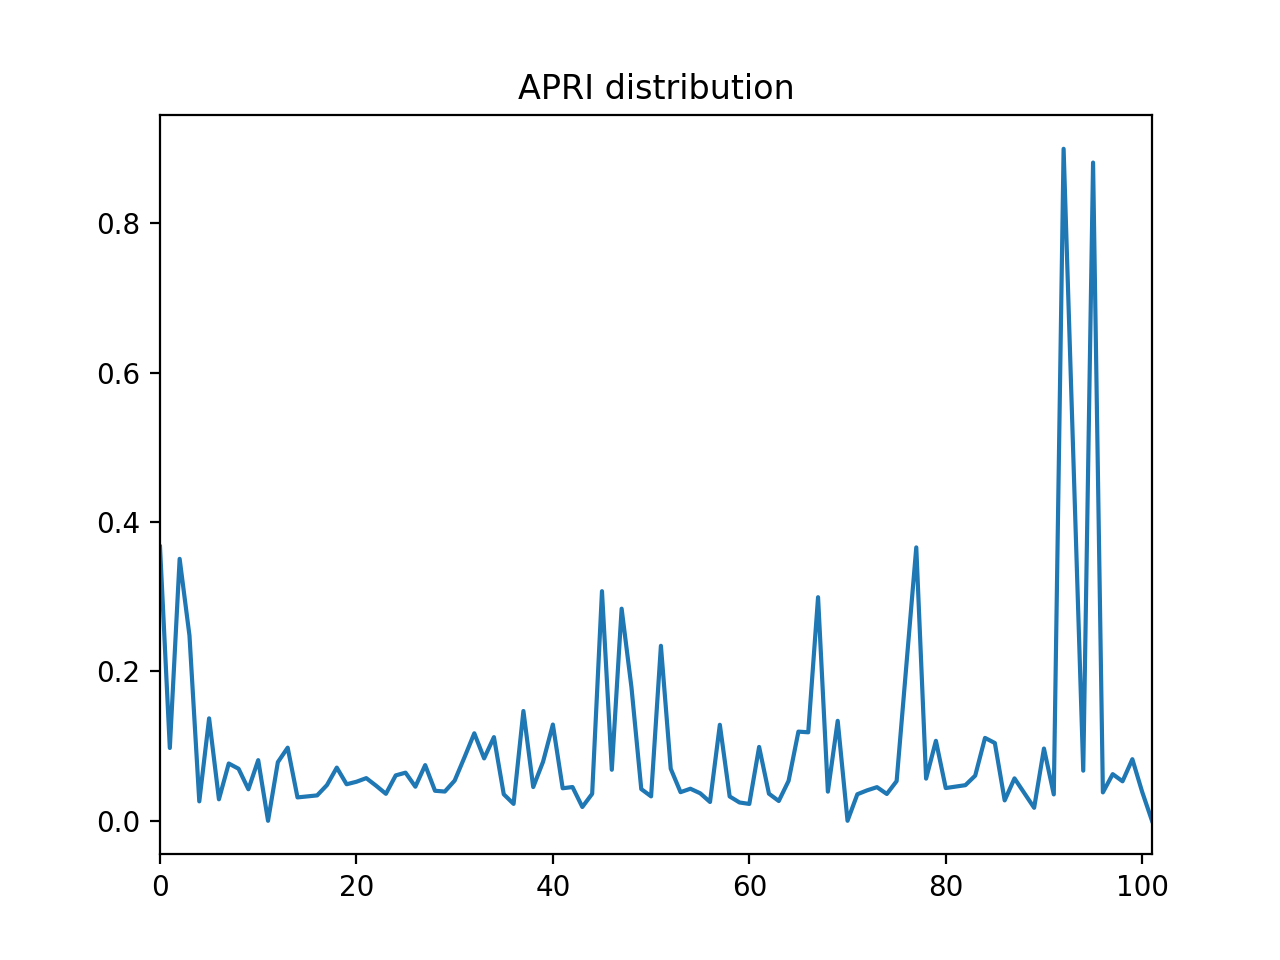

In [115]:
%matplotlib notebook
cleandata['APRI'][cleandata['APRI'] > 1] = 0.9    # 将异常值转化成90
cleandata['APRI'].plot(title='APRI distribution')

In [116]:
cleandata.head()

,result,KPA,APRI,FIB4,AP,CDS
0,0.75,11.922973,0.367112,851.699029,8,5
1,0.00,11.922973,0.097527,1785.142857,6,6
2,1.00,11.922973,0.350806,4108.645161,7,7
3,0.50,11.922973,0.248175,2916.058394,6,6
4,0.00,6.300000,0.026018,52.036199,3,4


/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jack/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/jack/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_n

<IPython.core.display.Javascript object>


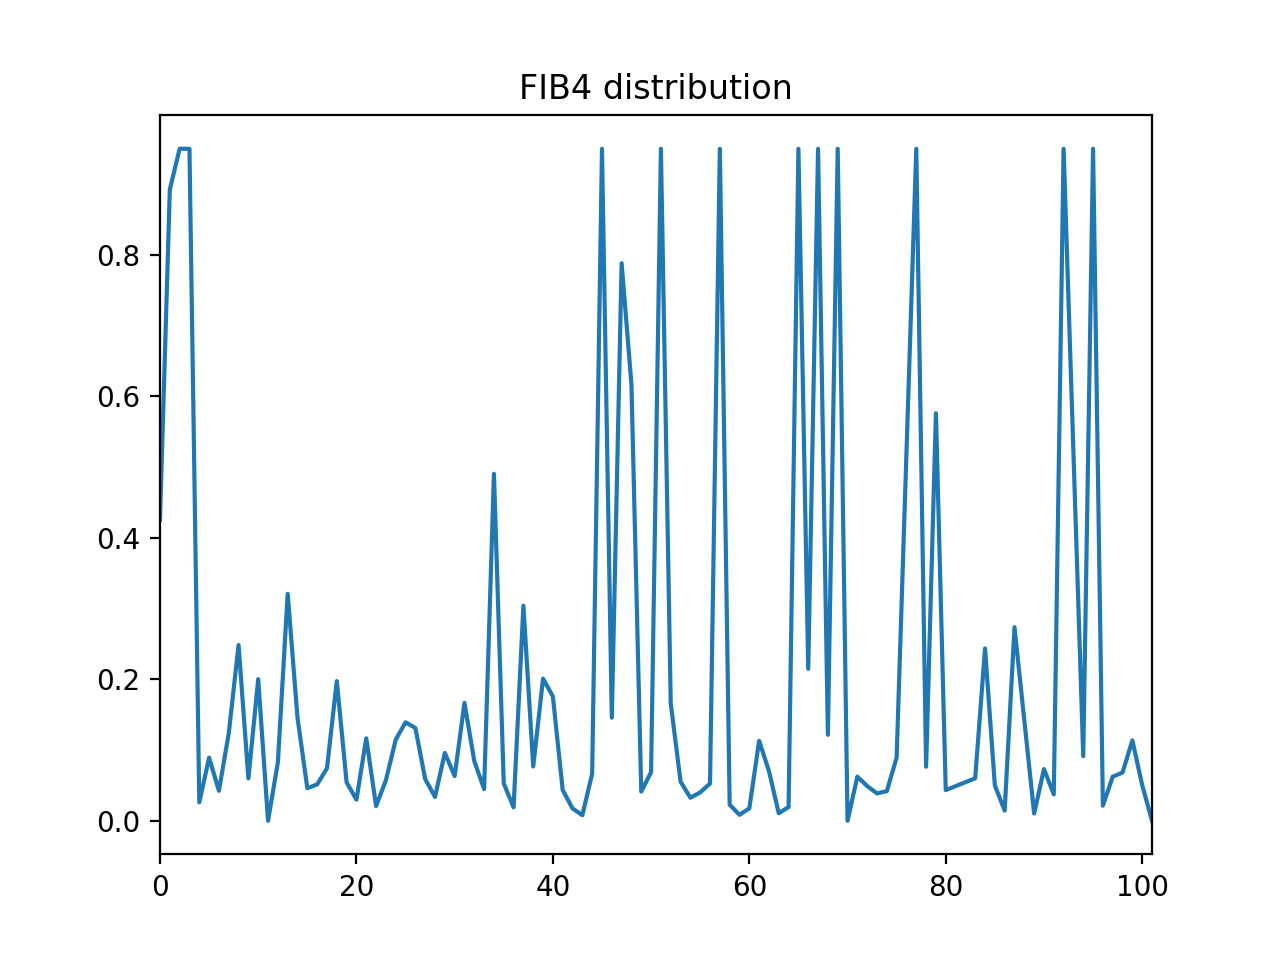

In [117]:
cleandata['FIB4'][cleandata['FIB4'] > 2000] = 1900   
cleandata['FIB4'] = cleandata['FIB4']/2000
cleandata['FIB4'].plot(title='FIB4 distribution')

In [118]:
cleandata.tail()

,result,KPA,APRI,FIB4,AP,CDS
97,0.25,9.5,0.062500,0.062400,6,6
98,0.25,8.1,0.052885,0.068221,2,5
99,0.75,9.8,0.082514,0.113671,4,5
100,0.25,12.8,0.038690,0.050491,5,5
101,0.25,11.8,0.000000,0.000000,3,3


In [119]:
cleandata['AP'] = cleandata['AP'] / 10
cleandata['CDS'] = cleandata['CDS'] / 10
cleandata.tail()

/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jack/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,result,KPA,APRI,FIB4,AP,CDS
97,0.25,9.5,0.062500,0.062400,0.6,0.6
98,0.25,8.1,0.052885,0.068221,0.2,0.5
99,0.75,9.8,0.082514,0.113671,0.4,0.5
100,0.25,12.8,0.038690,0.050491,0.5,0.5
101,0.25,11.8,0.000000,0.000000,0.3,0.3


In [102]:
cleandata.cov()

,result,KPA,APRI,FIB4,AP,CDS
result,0.076685,0.833426,0.011117,0.016818,0.014925,0.006700
KPA,0.833426,32.442913,0.337415,0.582548,0.138980,0.085644
APRI,0.011117,0.337415,0.013468,0.021827,0.006075,0.003102
FIB4,0.016818,0.582548,0.021827,0.068621,0.011538,0.009881
AP,0.014925,0.138980,0.006075,0.011538,0.049783,0.015954
CDS,0.006700,0.085644,0.003102,0.009881,0.015954,0.016624


In [120]:
cleandata.corr()

,result,KPA,APRI,FIB4,AP,CDS
result,1.000000,0.445590,0.343600,0.210553,0.278378,0.176457
KPA,0.445590,1.000000,0.373034,0.297156,0.101179,0.099748
APRI,0.343600,0.373034,1.000000,0.712751,0.363636,0.213330
FIB4,0.210553,0.297156,0.712751,1.000000,0.269396,0.285417
AP,0.278378,0.101179,0.363636,0.269396,1.000000,0.539547
CDS,0.176457,0.099748,0.213330,0.285417,0.539547,1.000000
